In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA =df[df['job_title'] == 'Data Analyst'].copy()

In [5]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')

df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value = 0)

In [6]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,...,mxnet,chainer,heroku,debian,clojure,pascal,suse,svelte,twilio,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2916,1820,1641,1474,1114,851,912,305,325,290,...,0,0,0,1,0,0,0,0,0,0
2,1972,1233,1140,965,805,589,580,255,229,212,...,0,0,0,0,0,0,0,0,0,0
3,1952,1243,1115,1022,808,586,556,204,221,222,...,0,0,0,0,0,0,1,0,0,0
4,1934,1222,1129,960,753,579,512,195,215,235,...,0,0,0,0,0,0,0,0,0,0
5,1844,1135,1057,886,720,558,400,183,196,167,...,0,0,0,0,0,0,0,0,0,0
6,2000,1238,1185,994,869,629,504,208,211,225,...,0,0,0,0,0,0,0,0,0,0
7,1891,1207,1142,944,773,608,454,192,194,194,...,0,0,0,0,0,1,0,0,0,1
8,2306,1537,1398,1209,1032,747,570,234,225,211,...,0,0,0,0,1,0,0,0,0,0
9,1767,1138,1041,883,808,521,426,183,127,132,...,0,0,0,0,0,0,0,0,0,0


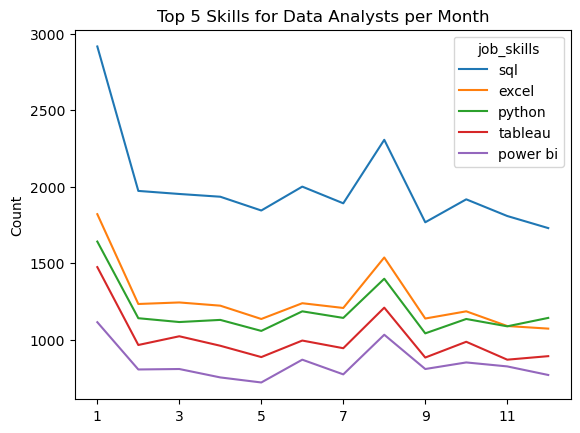

In [14]:
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Analysts per Month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()